In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [7]:
df=pd.DataFrame(datasets.load_iris().data,columns=datasets.load_iris().feature_names)

In [9]:
X=df

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler=StandardScaler()

In [13]:
X=scaler.fit_transform(X)

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca=PCA(n_components=2)

In [18]:
XTrans=pca.fit_transform(X)

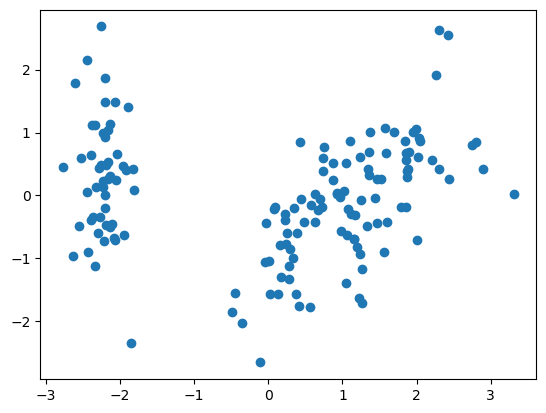

In [20]:
plt.scatter(XTrans[:,0],XTrans[:,1])

Text(0, 0.5, 'Euclidean Distance')

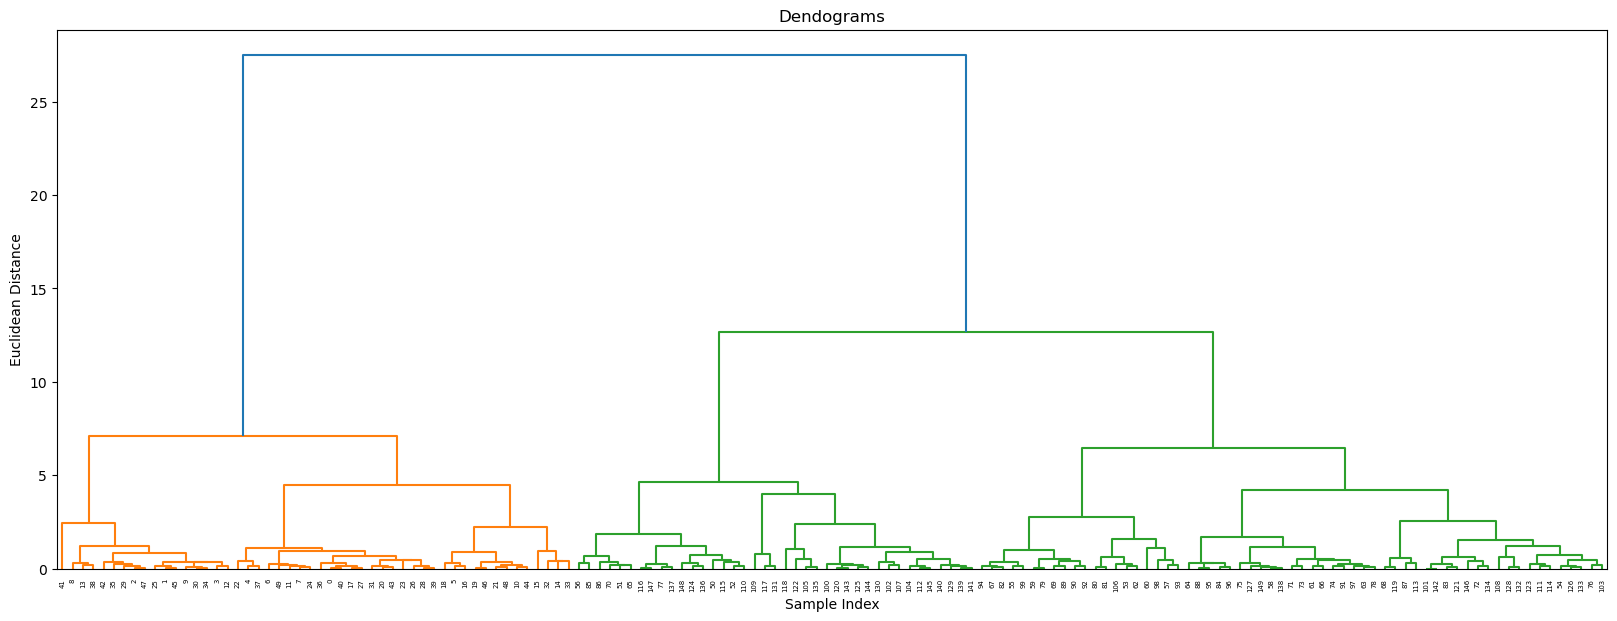

In [21]:
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(20,7))
plt.title('Dendograms')
sc.dendrogram(sc.linkage(XTrans,method='ward'))
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')

In [22]:
from sklearn.cluster import AgglomerativeClustering as agc

In [23]:
clus=agc(n_clusters=2,affinity='euclidean',linkage='ward')

In [24]:
clus.fit(XTrans)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [25]:
clus.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

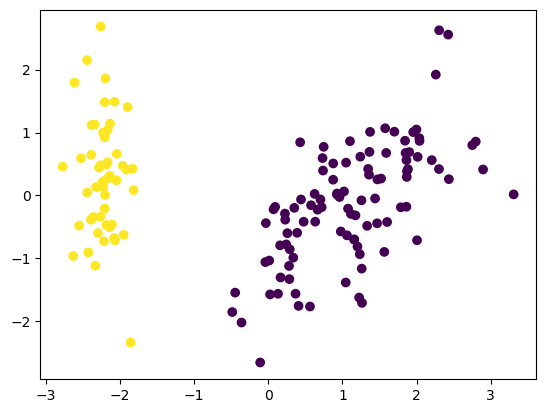

In [26]:
plt.scatter(XTrans[:,0],XTrans[:,1],c=clus.labels_)

In [27]:
from sklearn.metrics import silhouette_score as ss

In [28]:
print(ss(XTrans,clus.labels_))

0.6145202036230452


In [29]:
scores=[]
for k in range(2,11):
    clus=agc(n_clusters=k,affinity='euclidean',linkage='ward')
    clus.fit(XTrans)
    scr=ss(XTrans,clus.labels_)
    scores.append(scr)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 a

In [30]:
scores

[0.6145202036230452,
 0.511059598876619,
 0.4487350420958893,
 0.4041689631006268,
 0.3672112889583075,
 0.37068206789126684,
 0.3930552606912113,
 0.4183694466469874,
 0.40542056288894923]